In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/project/

/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project


In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(os.getcwd() + "/data/"):
    print(dirname)

/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/.ipynb_checkpoints
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/test
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/train
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/train_processed
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/test_processed
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/validation_processed
/content/drive/.shortcut-targets-by-id/10mODgOSFf3fLzrw5sXuVWhlwvZyG_SDQ/project/data/validation_processed/.ipynb_checkpoints


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters for plotting.
# plt.rc('figure', figsize=(8, 6))
sns.set(font_scale=1)

In [44]:
df = pd.read_csv(os.getcwd() + '/data/train.csv')
df

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
...,...,...
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885


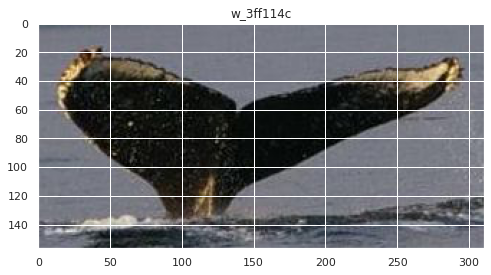

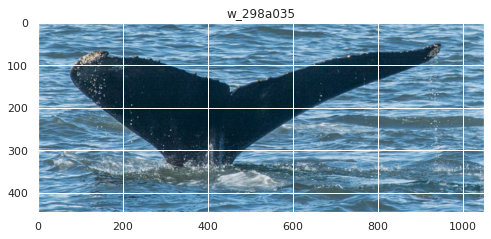

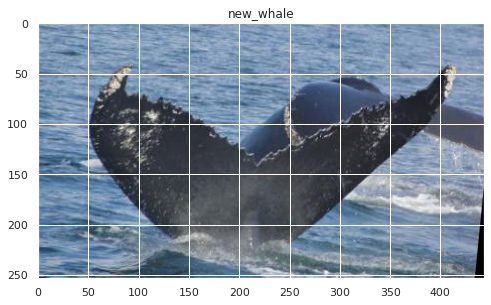

In [50]:
IMAGES_DIR = os.getcwd() + '/data/train/'
NUM_IMAGES_TO_PLOT = 3
image_filenames = os.listdir(IMAGES_DIR)

for i in range(NUM_IMAGES_TO_PLOT):
    image_filename = image_filenames[i]
    image_path = os.path.join(IMAGES_DIR, image_filename)
    image_np = plt.imread(image_path)
    whale_id = df.query(f"Image == '{image_filename}'").Id.item()
    plt.subplots(figsize=(8, 6))
    plt.imshow(image_np)
    plt.title(whale_id)

In [51]:
df2 = df.groupby('Id').agg('count').rename({'Image': 'NumImages'}, axis=1)
df2.sort_values('NumImages', ascending=False, inplace=True)
df2

,NumImages
Id,
new_whale,9664
w_23a388d,73
w_9b5109b,65
w_9c506f6,62
w_0369a5c,61
...,...
w_49ee8e0,1
w_49e0d44,1
w_49d1bcd,1


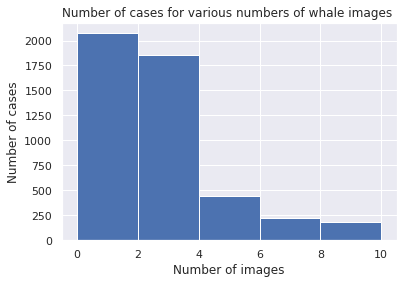

In [52]:
plt.figure(figsize=(6, 4))
df2.NumImages.hist(bins=list(range(0, 11, 2)))
plt.title('Number of cases for various numbers of whale images ')
plt.xlabel('Number of images')
plt.ylabel('Number of cases')
plt.show()

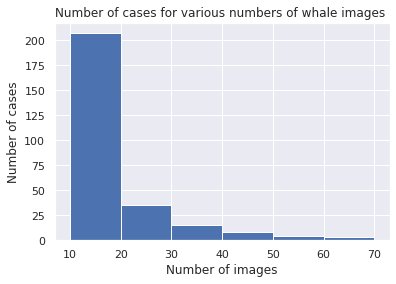

In [53]:
plt.figure(figsize=(6, 4))
df2.NumImages.hist(bins=list(range(10, 71, 10)))
plt.title('Number of cases for various numbers of whale images ')
plt.xlabel('Number of images')
plt.ylabel('Number of cases')
plt.show()

In [54]:
df2.drop('new_whale', inplace=True)
df2

,NumImages
Id,
w_23a388d,73
w_9b5109b,65
w_9c506f6,62
w_0369a5c,61
w_700ebb4,57
...,...
w_49ee8e0,1
w_49e0d44,1
w_49d1bcd,1


In [55]:
NUM_IMAGES_THRESHOLD = 20

df3 = df2.query(f'NumImages > {NUM_IMAGES_THRESHOLD}')

print('shape:', df3.shape)
print('total number of images:', df3.NumImages.sum())
df3

shape: (59, 1)
total number of images: 1977


,NumImages
Id,
w_23a388d,73
w_9b5109b,65
w_9c506f6,62
w_0369a5c,61
w_700ebb4,57
w_3de579a,54
w_564a34b,51
w_fd3e556,50
w_88e4537,49


In [56]:
ids_to_leave = list(df3.index)

filtered_df = df.query(f'Id in {ids_to_leave}')
filtered_df

,Image,Id
26,004e8ad5b.jpg,w_3de579a
30,0052ce2f5.jpg,w_2365d55
32,00570db6b.jpg,w_9c506f6
52,008bf89fc.jpg,w_6822dbc
54,00910010d.jpg,w_700ebb4
...,...,...
25331,ff9c31f7d.jpg,w_e1ffbe2
25339,ffad54783.jpg,w_f0fe284
25347,ffcd5efdc.jpg,w_f765256
25354,ffe52d320.jpg,w_bc285a6


In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

X, y = filtered_df.Image, filtered_df.Id
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
train_indices, test_indices = list(splitter.split(X, y))[0]

print('shapes:', train_indices.shape, test_indices.shape)

shapes: (1482,) (495,)


In [58]:
train_df = filtered_df.iloc[train_indices]
test_df = filtered_df.iloc[test_indices]

train_df.Id.nunique() == test_df.Id.nunique()

True

In [59]:
train_entries_counts = train_df.Id.value_counts().sort_index()
test_entries_counts = test_df.Id.value_counts().sort_index()

print('percentage of entries:')
print()
print(test_entries_counts / train_entries_counts)

percentage of entries:

w_0135f5f    0.352941
w_0369a5c    0.326087
w_04003e9    0.363636
w_08630fd    0.347826
w_0a155b9    0.333333
w_0bc078c    0.333333
w_17b0d3a    0.320000
w_1ca9ab1    0.360000
w_2365d55    0.318182
w_23a388d    0.327273
w_242fb46    0.352941
w_27597ff    0.333333
w_2b069ba    0.333333
w_343f088    0.333333
w_3815890    0.312500
w_3de579a    0.350000
w_4516ff1    0.312500
w_488865e    0.294118
w_51fc1fc    0.363636
w_5597026    0.312500
w_564a34b    0.342105
w_5773c71    0.352941
w_59052ad    0.318182
w_5a2634c    0.321429
w_5e8e218    0.333333
w_60ce6fc    0.321429
w_60cf87c    0.375000
w_6822dbc    0.333333
w_6caff0f    0.350000
w_6cda039    0.347826
w_700ebb4    0.325581
w_75f6ffa    0.333333
w_778e474    0.333333
w_789c969    0.323529
w_88e4537    0.324324
w_8c25681    0.347826
w_8da30ad    0.294118
w_91cc02c    0.315789
w_990921b    0.333333
w_9b5109b    0.326531
w_9c506f6    0.347826
w_9da1811    0.312500
w_a9304b9    0.321429
w_af367c3    0.346154
w_b9e591

In [60]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = IMAGES_DIR

# Specify image transformations for the data augmentation here. 
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=30,
    brightness_range=(0.5, 1.5),
    fill_mode='nearest',
    horizontal_flip=True
)

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

train_set_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_DIR,
    x_col='Image',
    y_col='Id',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # ensures one-hot encoding of class labels
)

test_set_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=TRAIN_DIR,
    x_col='Image',
    y_col='Id',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # ensures one-hot encoding of class labels
)

Found 1482 validated image filenames belonging to 59 classes.
Found 495 validated image filenames belonging to 59 classes.


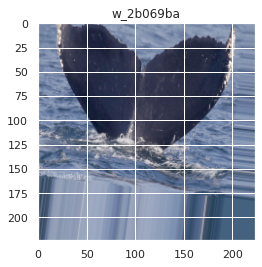

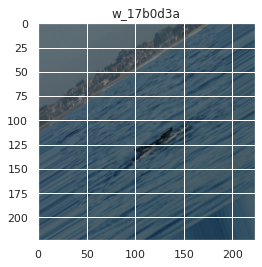

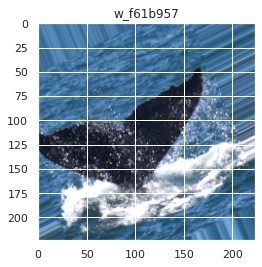

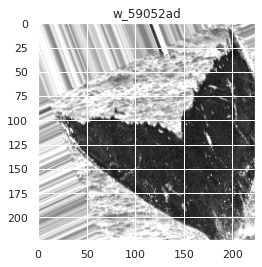

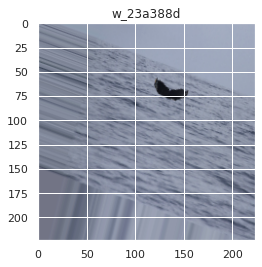

In [61]:
NUM_IMAGES_TO_PLOT = 5  # must be less than the BATCH_SIZE

# Get one batch of the training data.
for X, y in train_set_generator:
    break

# Get a list of unique whale IDs.
unique_whale_ids = train_df.Id.unique()

images_subbatch = X[:NUM_IMAGES_TO_PLOT]
one_hot_class_labels_subbatch = y[:NUM_IMAGES_TO_PLOT]

for image, one_hot_class_labels in zip(images_subbatch,
                                       one_hot_class_labels_subbatch):
    plt.subplots()
    plt.imshow(image)
    whale_id = unique_whale_ids[np.argmax(one_hot_class_labels)]
    plt.title(whale_id)
    plt.show()

In [62]:
from keras.applications.vgg16 import VGG16

# Form the correct input shape for the model in case the `TARGET_SIZE` 
# is not square (e.g. (224, 224)).
INPUT_SHAPE = (TARGET_SIZE[0], TARGET_SIZE[1], 3)

base_model = VGG16(
    weights='imagenet',  # load weights pretrained on the ImageNet
    include_top=False,  # do not include the ImageNet classifier at the top
    input_shape=INPUT_SHAPE,
    pooling='max'  # add a global max pooling layer after the base model
)

base_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [63]:
from keras.layers import Dropout, Dense

# Freeze the base model so that only the new top layers are trained.
base_model.trainable = False

num_classes = len(unique_whale_ids)

model = keras.Sequential([
    base_model,
    Dropout(0.2),
    Dense(128, activation='relu'),
    # Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, name='predictions')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 59)                7611      
                                                                 
Total params: 14,787,963
Trainable params: 73,275
Non-trainable params: 14,714,688
_________________________________________________________________


In [64]:
from keras.losses import CategoricalCrossentropy

EPOCHS = 30

# As the output of the model is real-numbered, set the `from_logits` 
# parameter of the crossentropy loss to True.
model.compile(
    optimizer='adam',
    loss=CategoricalCrossentropy(from_logits=True),  
    metrics=['accuracy']
)

history = model.fit(train_set_generator, 
                    epochs=EPOCHS,
                    validation_data=test_set_generator,
                    verbose=2   # don't display the progress bar
) 

Epoch 1/30
47/47 - 559s - loss: 4.2090 - accuracy: 0.0236 - val_loss: 4.0361 - val_accuracy: 0.0465 - 559s/epoch - 12s/step
Epoch 2/30
47/47 - 48s - loss: 4.0375 - accuracy: 0.0391 - val_loss: 3.9639 - val_accuracy: 0.0646 - 48s/epoch - 1s/step
Epoch 3/30
47/47 - 50s - loss: 4.0047 - accuracy: 0.0459 - val_loss: 3.9376 - val_accuracy: 0.0808 - 50s/epoch - 1s/step
Epoch 4/30
47/47 - 49s - loss: 3.9572 - accuracy: 0.0621 - val_loss: 3.8607 - val_accuracy: 0.0889 - 49s/epoch - 1s/step
Epoch 5/30
47/47 - 49s - loss: 3.8634 - accuracy: 0.0742 - val_loss: 3.7869 - val_accuracy: 0.0990 - 49s/epoch - 1s/step
Epoch 6/30
47/47 - 52s - loss: 3.7990 - accuracy: 0.0945 - val_loss: 3.7067 - val_accuracy: 0.0929 - 52s/epoch - 1s/step
Epoch 7/30
47/47 - 49s - loss: 3.7177 - accuracy: 0.1032 - val_loss: 3.6101 - val_accuracy: 0.1313 - 49s/epoch - 1s/step
Epoch 8/30
47/47 - 48s - loss: 3.6333 - accuracy: 0.1120 - val_loss: 3.4953 - val_accuracy: 0.1394 - 48s/epoch - 1s/step
Epoch 9/30
47/47 - 48s - loss

In [65]:
base_model.trainable = True

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 predictions (Dense)         (None, 59)                7611      
                                                                 
Total params: 14,787,963
Trainable params: 14,787,963
Non-trainable params: 0
_________________________________________________________________


In [66]:
from keras.optimizers import Adam

FINE_TUNING_EPOCHS = 30

model.compile(optimizer=Adam(1e-5),  # set the learning rate to a low value
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

fine_tuning_history = model.fit(train_set_generator, 
                                epochs=FINE_TUNING_EPOCHS,
                                validation_data=train_set_generator,
                                verbose=2  # don't display the progress bar
)

Epoch 1/30
47/47 - 85s - loss: 2.4384 - accuracy: 0.3455 - val_loss: 1.9094 - val_accuracy: 0.4892 - 85s/epoch - 2s/step
Epoch 2/30
47/47 - 76s - loss: 2.2194 - accuracy: 0.3691 - val_loss: 1.7853 - val_accuracy: 0.5155 - 76s/epoch - 2s/step
Epoch 3/30
47/47 - 77s - loss: 2.1136 - accuracy: 0.4076 - val_loss: 1.6348 - val_accuracy: 0.5641 - 77s/epoch - 2s/step
Epoch 4/30
47/47 - 77s - loss: 1.9918 - accuracy: 0.4318 - val_loss: 1.5241 - val_accuracy: 0.5776 - 77s/epoch - 2s/step
Epoch 5/30
47/47 - 76s - loss: 1.8242 - accuracy: 0.4696 - val_loss: 1.3442 - val_accuracy: 0.6343 - 76s/epoch - 2s/step
Epoch 6/30
47/47 - 78s - loss: 1.7377 - accuracy: 0.5020 - val_loss: 1.2823 - val_accuracy: 0.6350 - 78s/epoch - 2s/step
Epoch 7/30
47/47 - 76s - loss: 1.6876 - accuracy: 0.5108 - val_loss: 1.2307 - val_accuracy: 0.6491 - 76s/epoch - 2s/step
Epoch 8/30
47/47 - 78s - loss: 1.6412 - accuracy: 0.5175 - val_loss: 1.1397 - val_accuracy: 0.6889 - 78s/epoch - 2s/step
Epoch 9/30
47/47 - 82s - loss: 1

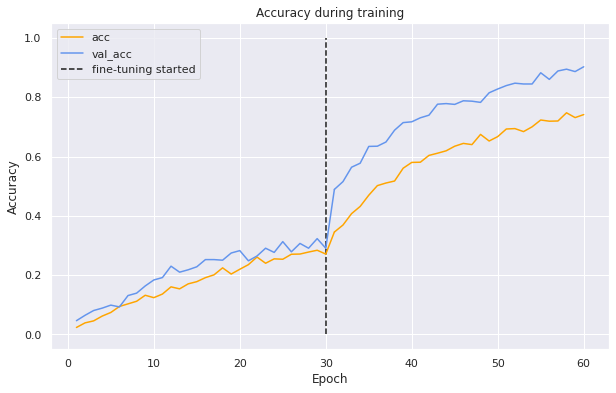

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fine_tuning_acc = fine_tuning_history.history['accuracy']
fine_tuning_val_acc = fine_tuning_history.history['val_accuracy']

top_layers_training_epochs = list(range(1, EPOCHS + 1))
fine_tuning_epochs = list(range(EPOCHS + 1, 
                                EPOCHS + FINE_TUNING_EPOCHS + 1))

ax = plt.figure(figsize=(10, 6))

plt.plot(top_layers_training_epochs, acc, label='acc', color='orange')
plt.plot(top_layers_training_epochs, val_acc, label='val_acc', 
         color='cornflowerblue')

plt.plot(fine_tuning_epochs, fine_tuning_acc, color='orange')
plt.plot(fine_tuning_epochs, fine_tuning_val_acc, color='cornflowerblue')
plt.plot([EPOCHS, EPOCHS + 1], [acc[-1], fine_tuning_acc[0]], 
         color='orange')

plt.plot([EPOCHS, EPOCHS + 1], [val_acc[-1], fine_tuning_val_acc[0]], 
         color='cornflowerblue')

plt.vlines(EPOCHS, ymin=0, ymax=1, linestyles='dashed',
           label='fine-tuning started')

plt.legend(loc='best')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

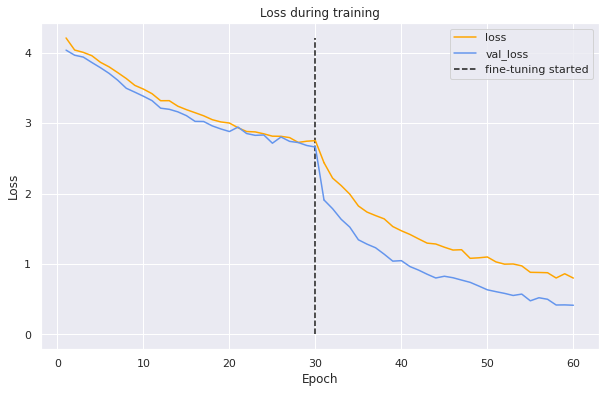

In [68]:
loss = history.history['loss']
val_loss = history.history['val_loss']

fine_tuning_loss = fine_tuning_history.history['loss']
fine_tuning_val_loss = fine_tuning_history.history['val_loss']

top_layers_training_epochs = list(range(1, EPOCHS + 1))

ax = plt.figure(figsize=(10, 6))

plt.plot(top_layers_training_epochs, loss, label='loss', color='orange')
plt.plot(top_layers_training_epochs, val_loss, label='val_loss', 
         color='cornflowerblue')

plt.plot(fine_tuning_epochs, fine_tuning_loss, color='orange')
plt.plot(fine_tuning_epochs, fine_tuning_val_loss, color='cornflowerblue')
plt.plot([EPOCHS, EPOCHS + 1], [loss[-1], fine_tuning_loss[0]], 
         color='orange')

plt.plot([EPOCHS, EPOCHS + 1], [val_loss[-1], fine_tuning_val_loss[0]], 
         color='cornflowerblue')

max_loss = max(max(loss), max(val_loss), 
               max(fine_tuning_loss), max(fine_tuning_val_loss))

plt.vlines(EPOCHS, ymin=0, ymax=max_loss, linestyles='dashed', 
           label='fine-tuning started')

plt.legend(loc='best')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [74]:
fine_tuning_history.history['val_accuracy'][-1]

0.9028339982032776

In [75]:
fine_tuning_history.history['val_loss'][-1]

0.4149608910083771